# ////////////////////////////////////////

# Problem statement:
Analyze music trends and predict song popularity based on its musical sttribute (Danceability, Valence, Energy, Acousticness, Instrumentalness, Liveness, Speechiness) using data from 2010 onwards



# ////////////////////////////////////////

# Data collection:

## Dataset origin: 
## https://www.kaggle.com/code/hassanelkarni/spotify-analysis

In [530]:
# import the neccesary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support,mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
sb.set() 

In [531]:
spotify = pd.read_csv('spotify.csv', encoding='ISO-8859-1')

In [494]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [495]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

# ////////////////////////////////////////

# Data Cleaning:



In [496]:
# Convert 'streams' column to numeric (integer)
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

In [497]:
# Years in the Dataset
print("Songs of Released Year :", len(spotify["released_year"].unique()))

Songs of Released Year : 50


released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64


C:\Users\hangb\Downloads\Anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



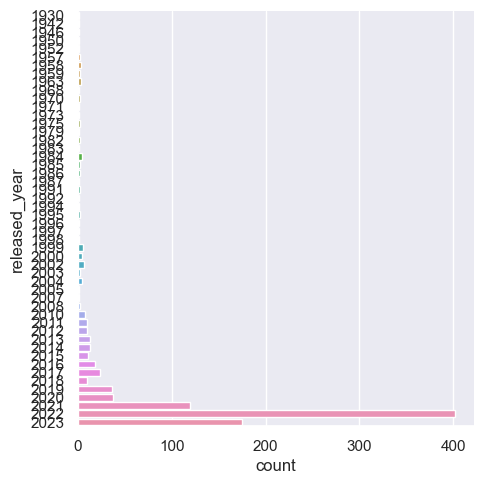

In [498]:
# Songs in each Year
print(spotify["released_year"].value_counts())
sb.catplot(y = "released_year", data = spotify, kind = "count")

## Since we are trying to find how to create a hit song nowadays, what we need is to find the current trends in music. And so, we have opted to only analyse data from the last 14-15 years (2010 onwards) for a more relevant analysis of the trends

In [499]:
# Cleaning up the data
spotify = spotify[spotify["released_year"] >= 2010]

In [500]:
# Released_year in the Dataset
print("Songs of Released Year :", len(spotify["released_year"].unique()))

Songs of Released Year : 14


released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2013     13
2014     13
2015     11
2018     10
2012     10
2011     10
2010      7
Name: count, dtype: int64


C:\Users\hangb\Downloads\Anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



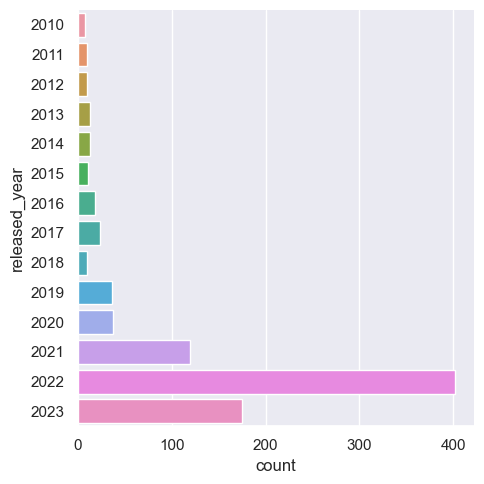

In [501]:
# Songs in each Year
print(spotify["released_year"].value_counts())
sb.catplot(y = "released_year", data = spotify, kind = "count")

In [502]:
# Most Streamed Songs (the Top 10)
spotify.sort_values('streams', ascending=False).head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,...,186,G,Major,68,49,59,16,0,13,28


In [503]:
# Drop irrelevant variables
spotify.drop(['track_name', 'artist(s)_name', 'artist_count', 'released_month', 
              'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
              'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 
              'mode'], axis=1, inplace=True)

C:\Users\hangb\AppData\Local\Temp\ipykernel_38476\2392326361.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# ////////////////////////////////////////

# Exploratory Data Analysis:

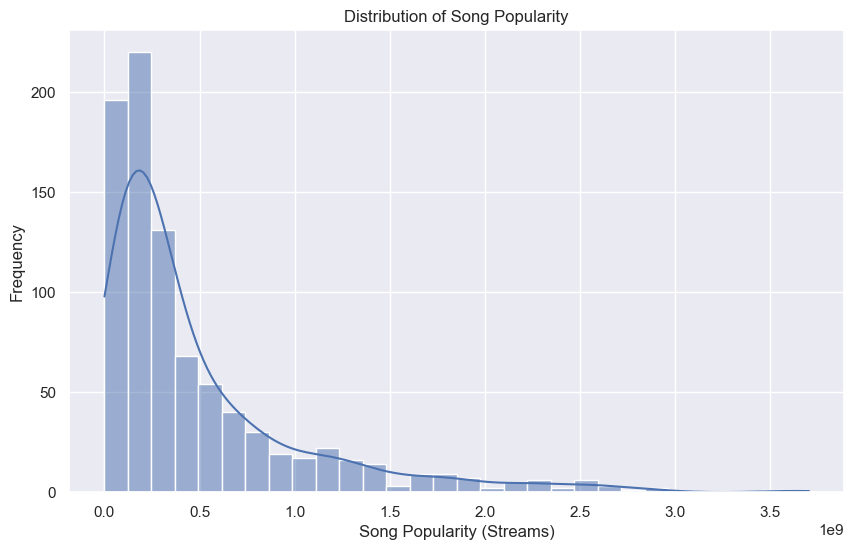

In [504]:
plt.figure(figsize=(10, 6))
sb.histplot(spotify['streams'], bins=30, kde=True)
plt.xlabel('Song Popularity (Streams)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Popularity')
plt.show()

## It seems like most songs fall short of x = 1 (1 billion streams). Keep that in mind, as it will come up later.

## Visual overview of how these musical attritbutes are distributed across the songs 

<Axes: ylabel='Count'>

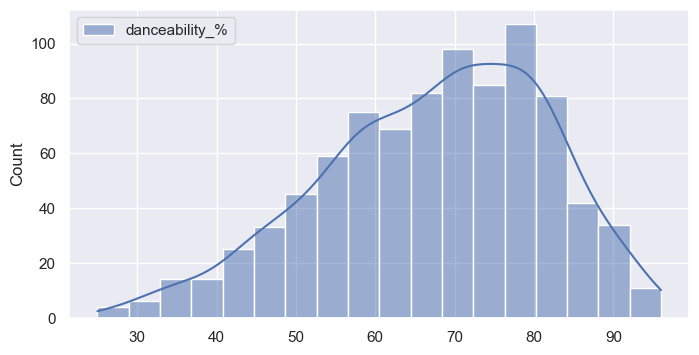

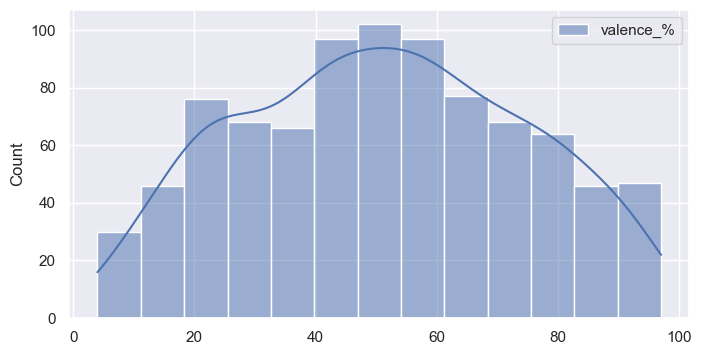

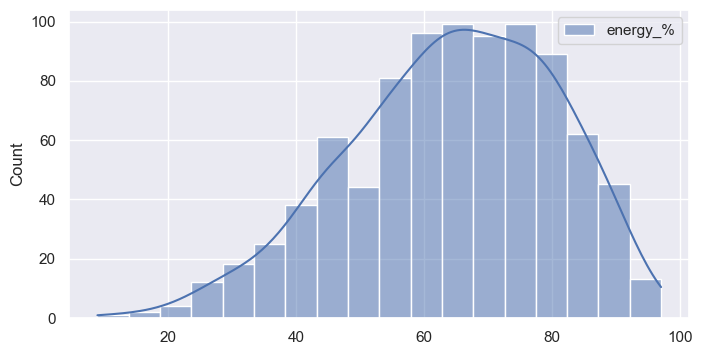

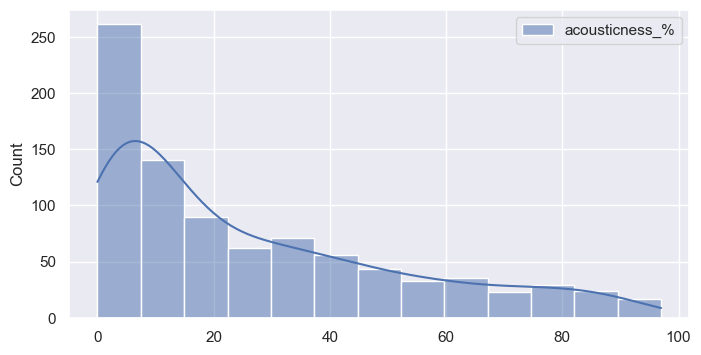

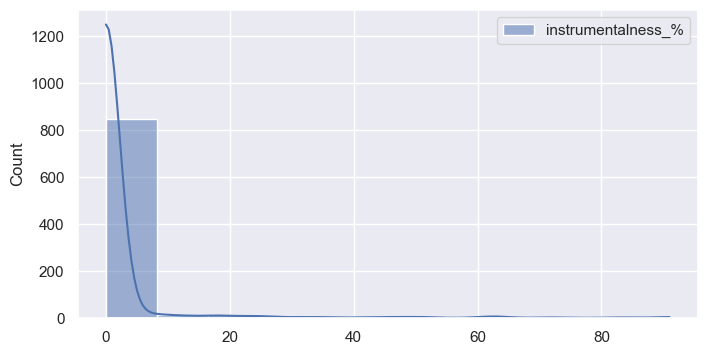

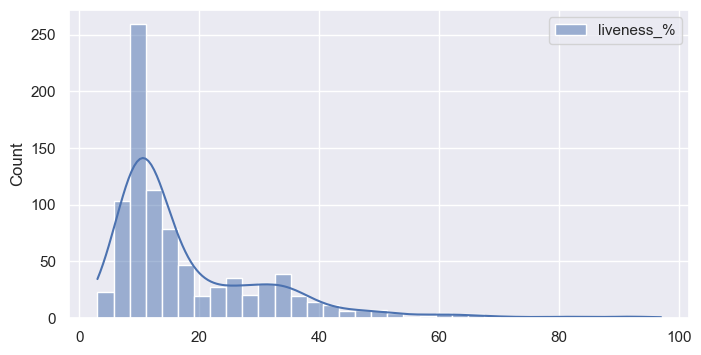

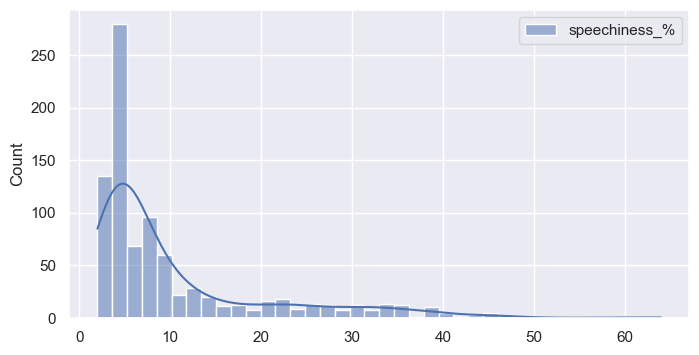

In [505]:
danceability=pd.DataFrame(spotify["danceability_%"])
f = plt.figure(figsize=(8, 4))
sb.histplot(danceability, kde='true')

valence=pd.DataFrame(spotify["valence_%"])
f = plt.figure(figsize=(8, 4))
sb.histplot(valence, kde='true')

energy=pd.DataFrame(spotify["energy_%"])
f = plt.figure(figsize=(8, 4))
sb.histplot(energy, kde='true')

acousticness=pd.DataFrame(spotify["acousticness_%"])
f = plt.figure(figsize=(8, 4))
sb.histplot(acousticness, kde='true')

instrumentalness=pd.DataFrame(spotify["instrumentalness_%"])
f = plt.figure(figsize=(8, 4))
sb.histplot(instrumentalness, kde='true')

liveness=pd.DataFrame(spotify["liveness_%"])
f = plt.figure(figsize=(8, 4))
sb.histplot(liveness, kde='true')

speechiness=pd.DataFrame(spotify["speechiness_%"])
f = plt.figure(figsize=(8, 4))
sb.histplot(speechiness, kde='true')


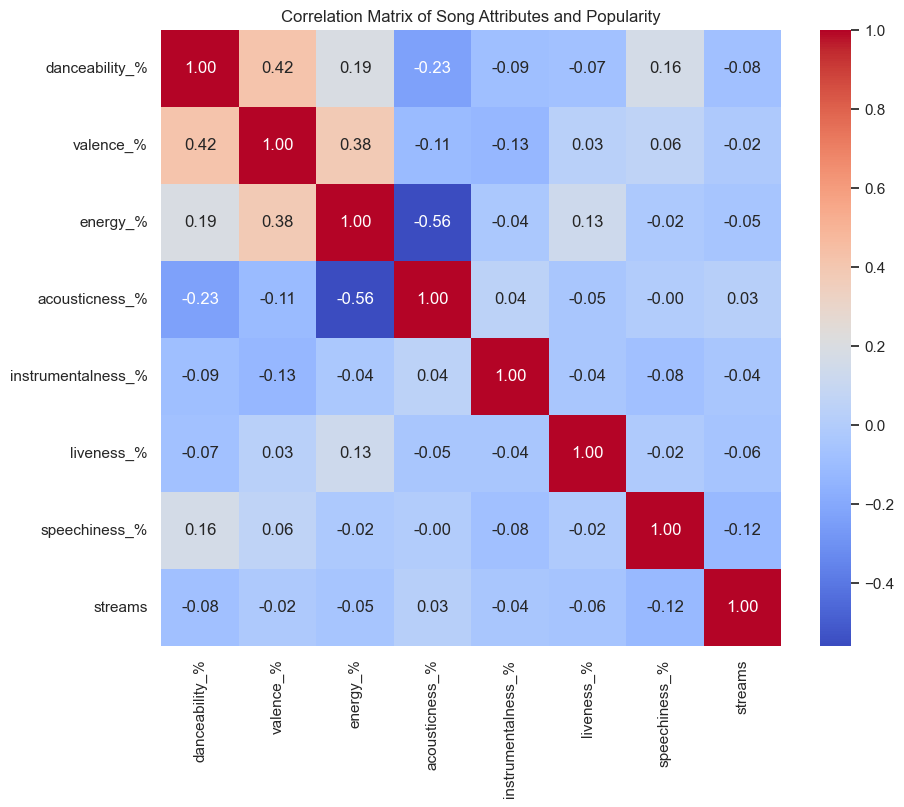

In [506]:
# Investigate correlations between song attributes and song popularity
attributes = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']
correlation_matrix = spotify[attributes].corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Song Attributes and Popularity')
plt.show()

# ////////////////////////////////////////

# Machine learning 
### Predict how the popular the song will be based on the attributes and the number of streams

## Approach 1 (Linear Regression model) 

Intercept of Regression 	: b =  [8.60166436e+08]
Coefficients of Regression 	: a =  [[-2904451.03638587   328023.01942222  -999784.08494216 -1294368.36398219
  -3463457.37093524 -2205551.77251557 -6467177.06516542]]

           Predictors  Coefficients
0      danceability_% -2.904451e+06
1           valence_%  3.280230e+05
2            energy_% -9.997841e+05
3      acousticness_% -1.294368e+06
4  instrumentalness_% -3.463457e+06
5          liveness_% -2.205552e+06
6       speechiness_% -6.467177e+06



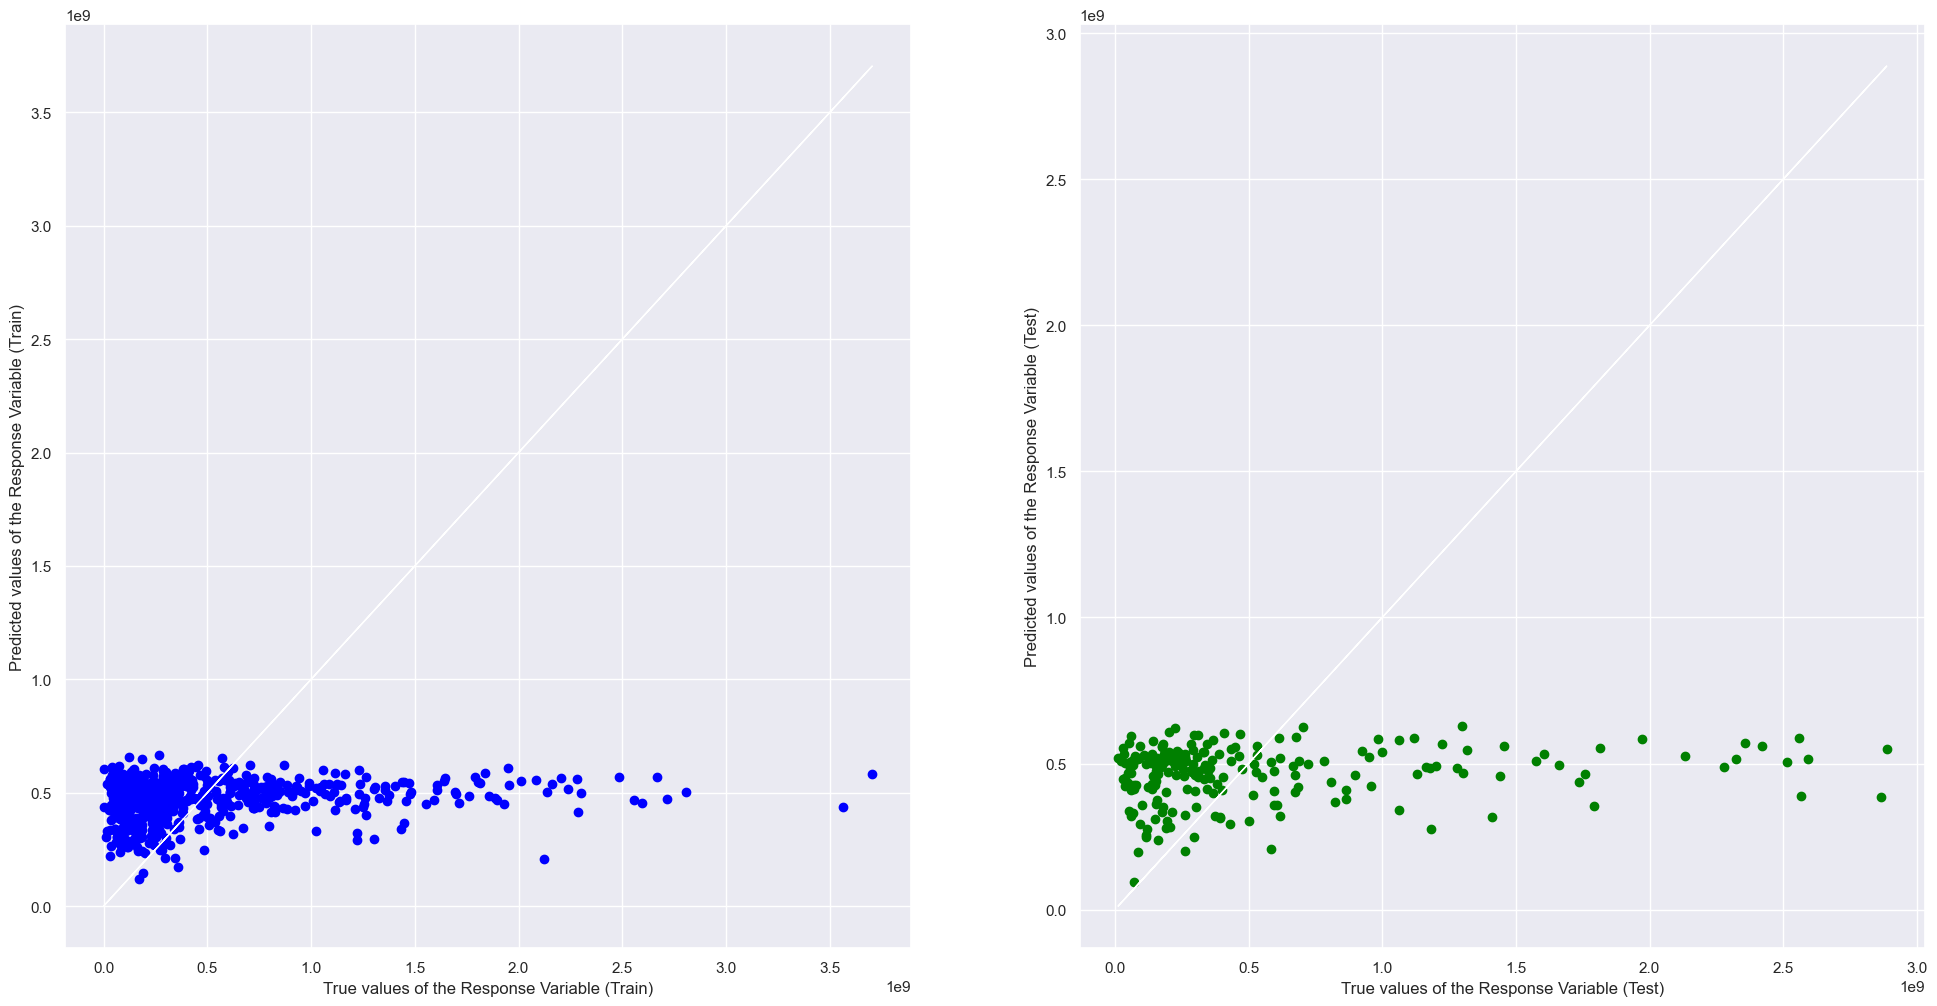

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.026449606209325016
Mean Squared Error (MSE) 	: 2.7910934671145248e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.01054730032542972
Mean Squared Error (MSE) 	: 3.707190870191437e+17



In [507]:
# Extract Response and Predictors
y = pd.DataFrame(spotify["streams"])
X = pd.DataFrame(spotify[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Analysis on approach 1 

### Explained Variance (R²):
For the train dataset, an R² of approximately 0.038 means that around 3.8% of the variance in the target variable is explained by the linear regression model. In other words, the model accounts for a small portion of the variability in the train dataset.
For the test dataset, an R² of approximately -0.005 means that the model performs poorly on the test data. A negative R² indicates that the model is performing worse than a horizontal line (a constant model) fitted to the data. This could indicate overfitting or a poorly fitting model.en data.

### Mean Squared Error (MSE):
The MSE for the train dataset is approximately 2.846×10^17 while the MSE for the test dataset is approximately 3.519×10^17.
Since MSE measures the average squared difference between the actual and predicted values, A high MSE for the train dataset indicates a large error between the actual and predicted values, suggesting that the model's predictions are not accurate.
A high MSE for the test dataset indicates poor predictive performance of the model on unseen data.

## Conclusion on approach 1 

These metrics indicate that the linear regression model is not performing well in explaining the variance or making accurate predictions on both the training and test datasets. The R² values are  also low, indicating low explanatory power, and the high MSE values suggest significant errors in the model's predictions.We decided on another approach.

# Approach 2 (Using a total of all musical attributes)

## Grades quantified
Reasonsing: we want to quantify the percentages of the musical attributes into a total value which we will use to compare against streams to see if the musical attributes correlate to the number of streams it has. 
| Percentage Range | Grade |
|------------------|-------|
| 90-100%          | 4.0   |
| 80-89%           | 3.7   |
| 70-79%           | 3.5   |
| 60-69%           | 3.3   |
| 50-59%           | 3.0   |
| 40-49%           | 2.7   |
| 30-39%           | 2.5   |
| 20-29%           | 2.3   |
| 10-19%           | 2.0   |
| 0-9%             | 0.0   |

In [508]:
# Define a function to map percentage values to grades
def map_percentage_to_grade(percentage, col_name):
    if col_name in ['danceability_%', 'valence_%', 'energy_%',
                    'acousticness_%', 'instrumentalness_%', 
                    'liveness_%', 'speechiness_%']:
        if percentage >= 95:
            return 4.0
        elif percentage >= 90:
            return 3.7
        elif percentage >= 85:
            return 3.5
        elif percentage >= 80:
            return 3.3
        elif percentage >= 75:
            return 3.0
        elif percentage >= 70:
            return 2.7
        elif percentage >= 65:
            return 2.5
        elif percentage >= 60:
            return 2.3
        elif percentage >= 55:
            return 2.0
        elif percentage >= 50:
            return 1.7
        elif percentage >= 45:
            return 1.5
        elif percentage >= 40:
            return 1.3
        elif percentage >= 35:
            return 1.0
        else:
            return 0.0

In [509]:
# Make a copy of the spotify dataset for approach 2
spotify_graded = pd.DataFrame(spotify)

# List of columns to apply the function
cols = ['danceability_%', 'valence_%', 'energy_%',
        'acousticness_%', 'instrumentalness_%', 
        'liveness_%', 'speechiness_%']


# Apply the function to each column
for col in cols:
    spotify_graded[col] = spotify_graded[col].apply(lambda x: map_percentage_to_grade(x, col))

# Add the numerical values to a total for each song
spotify_graded['total_grade'] = spotify_graded[cols].sum(axis=1)


In [510]:
spotify_graded.head()

,released_year,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,total_grade
0,2023,141381703.0,3.3,3.5,3.3,0.0,0.0,0.0,0.0,10.1
1,2023,133716286.0,2.7,2.3,2.7,0.0,0.0,0.0,0.0,7.7
2,2023,140003974.0,1.7,0.0,1.7,0.0,0.0,0.0,0.0,3.4
3,2019,800840817.0,2.0,2.0,2.7,0.0,0.0,0.0,0.0,6.7
4,2023,303236322.0,2.5,0.0,3.3,0.0,2.3,0.0,0.0,8.1


# Using different ways to visualise this data 

## 1. Scatter Graph

In [511]:
fig = px.scatter(spotify_graded, x='total_grade', y='streams', title='Total Grade vs. Number of Streams')
fig.update_layout(xaxis_title='Total Grade', yaxis_title='Number of Streams')
fig.show()

# 2. Violin Plot

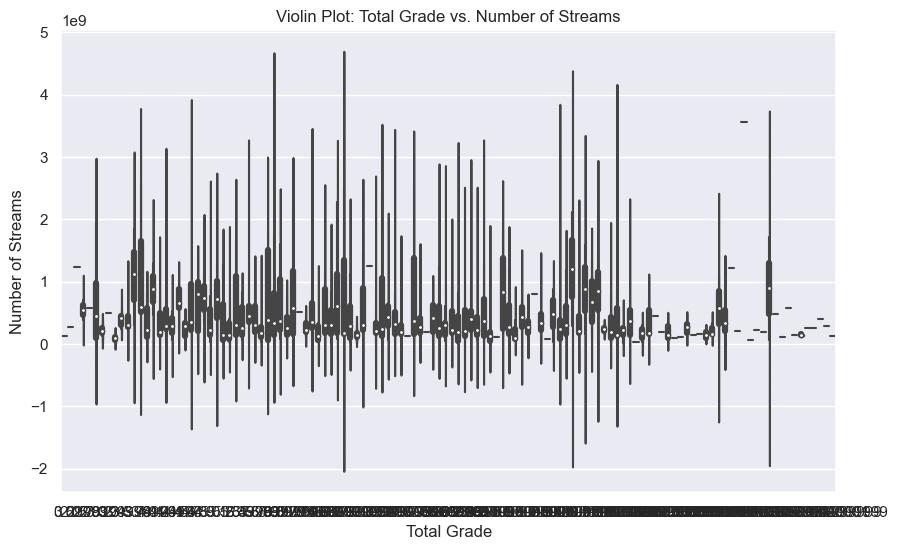

In [512]:
# Create a violin plot using seaborn
plt.figure(figsize=(10, 6))
sb.violinplot(x='total_grade', y='streams', data=spotify_graded)
plt.xlabel('Total Grade')
plt.ylabel('Number of Streams')
plt.title('Violin Plot: Total Grade vs. Number of Streams')
plt.show()

## 3. Joint plot 

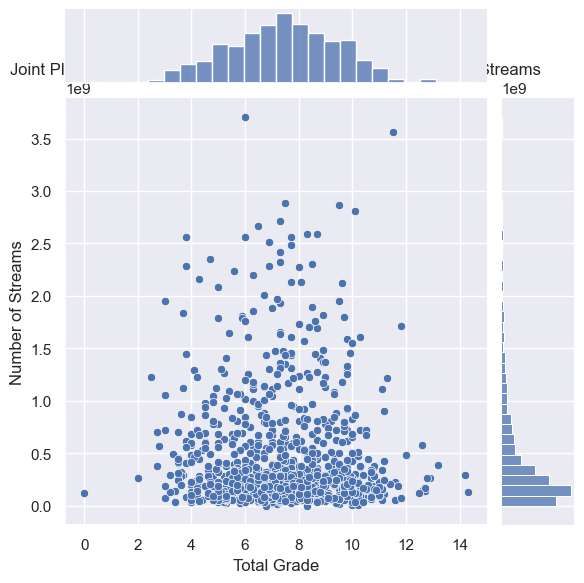

In [513]:
# Create a joint plot with marginal histograms using seaborn
sb.jointplot(x='total_grade', y='streams', data=spotify_graded, kind='scatter')
plt.xlabel('Total Grade')
plt.ylabel('Number of Streams')
plt.title('Joint Plot with Marginal Histograms: Total Grade vs. Number of Streams')
plt.show()

## 4.Clustered bar chart

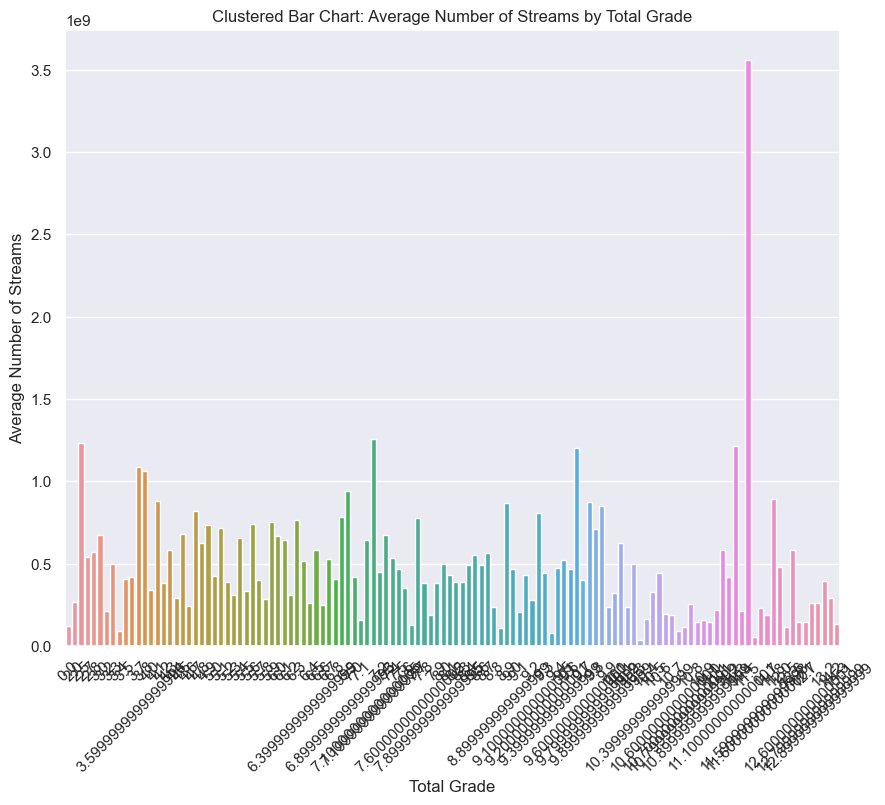

In [514]:
# Create a clustered bar chart using seaborn
plt.figure(figsize=(10, 8))
sb.barplot(x='total_grade', y='streams', data=spotify_graded, estimator=np.mean, errorbar=None)
plt.xlabel('Total Grade')
plt.ylabel('Average Number of Streams')
plt.title('Clustered Bar Chart: Average Number of Streams by Total Grade')
# Rotate x-axis labels at 45 degrees
plt.xticks(rotation=45)
plt.show()

In [515]:
# Check the data type of the 'streams' column
print(spotify_graded['streams'].dtype)

# Convert the 'streams' column to numeric if it's not already
spotify_graded['streams'] = pd.to_numeric(spotify_graded['streams'], errors='coerce')

# Calculate the correlation between total grade and number of streams
correlation = spotify_graded['total_grade'].corr(spotify_graded['streams'])
print(f'Correlation between Total Grade and Number of Streams: {correlation}')

float64
Correlation between Total Grade and Number of Streams: -0.06203739697344258


Intercept of Regression 	: b =  [5.52530976e+08]
Coefficients of Regression 	: a =  [[-9698364.85754156]]

    Predictors  Coefficients
0  total_grade -9.698365e+06



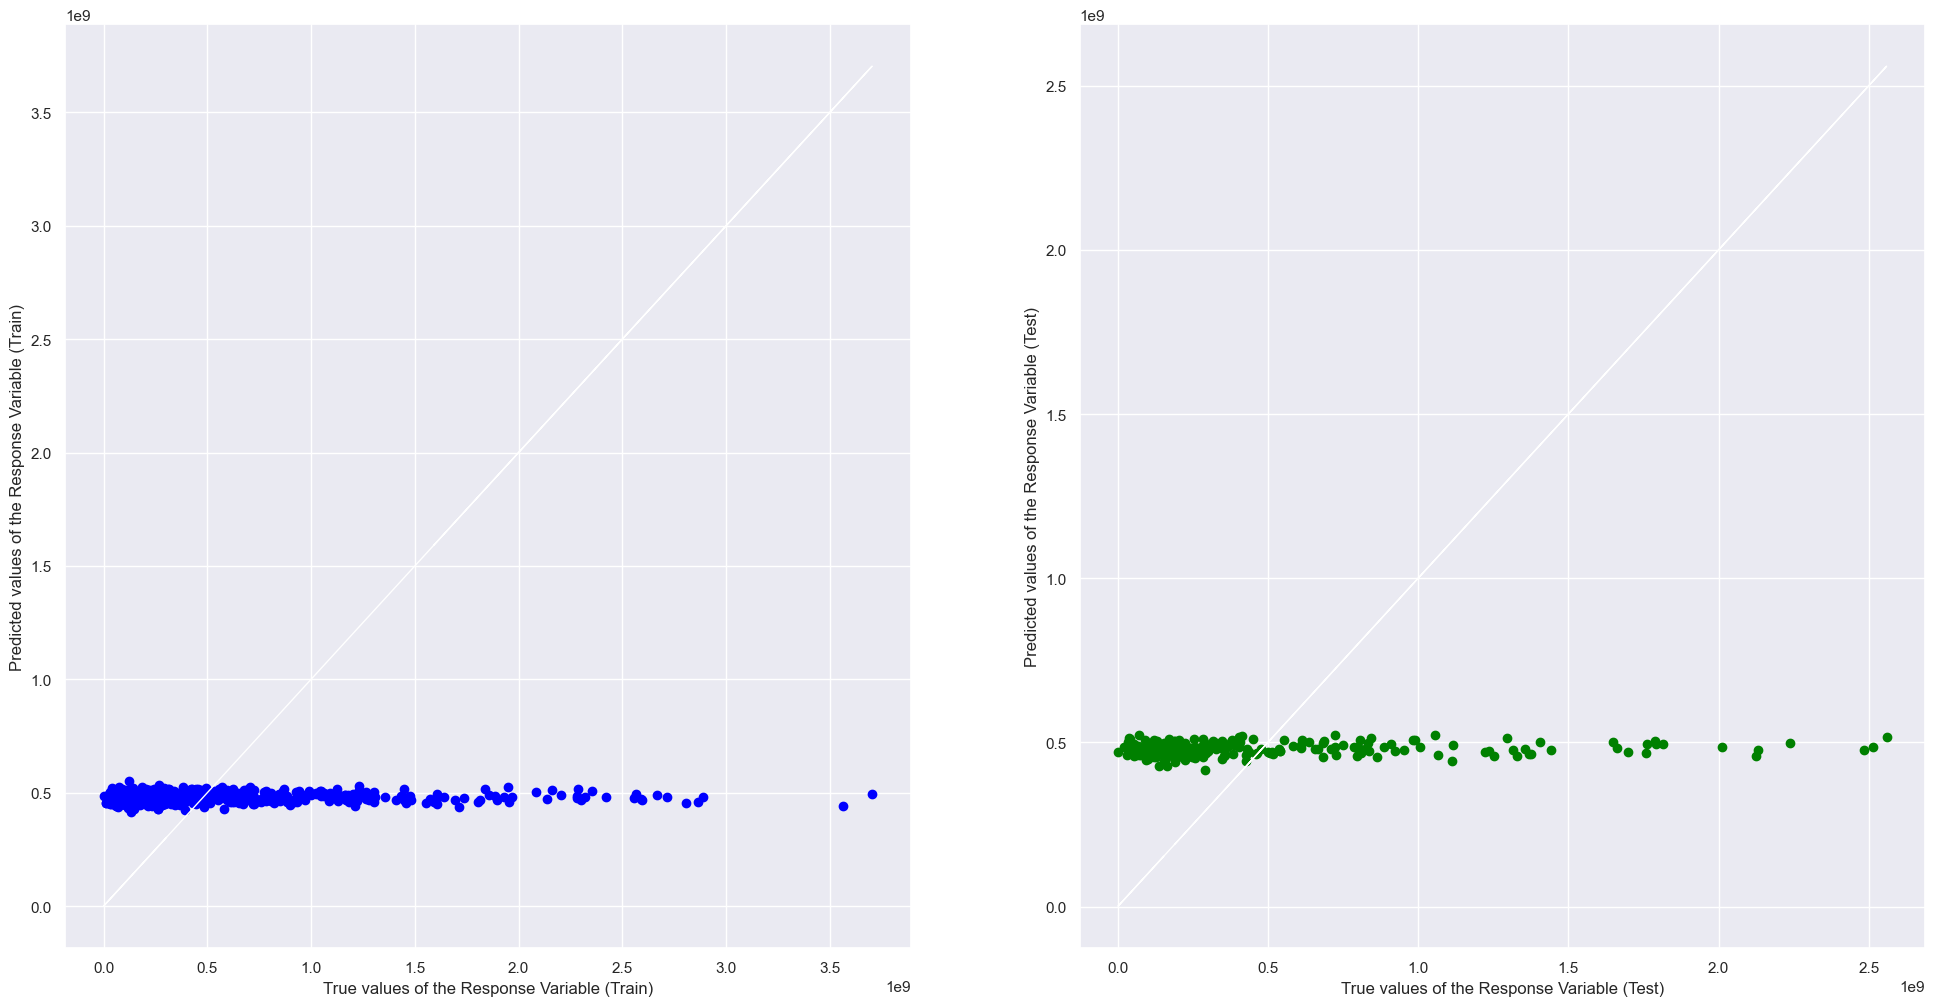

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0013081437970183796
Mean Squared Error (MSE) 	: 3.187249275513555e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.008291085676092935
Mean Squared Error (MSE) 	: 2.7732819056681005e+17



In [516]:
# Extract Response and Predictors
y = pd.DataFrame(spotify_graded["streams"])
X = pd.DataFrame(spotify_graded[['total_grade']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Analysis of approach 2
The correlation coefficient value of somewhere around -0.06 indicates a weak negative correlation between total_grade and streams. This means that there is a slight tendency that as the total_grade (which is the sum of the grades for various song attributes) increases, the number of streams (or plays) decreases, and vice versa. However, the correlation is very weak, suggesting that total_grade is not a strong predictor of streams.

## Conclusion 

Linear regression model is not performing well in explaining the variance or making accurate predictions on both the training and test datasets. The R² values are also low, indicating low explanatory power, and the high MSE values suggest significant errors in the model's predictions. 


Regression is not a good model for this problem and so we decided to turn the problem from a numeric problem into a classification problem. 

# Approach 3 (Using a decision tree)

We introduce a new column called 'Billion' to see if a song has equal to or above a billion streams

In [517]:
# Make a copy of the spotify dataset for approach 3
spotify_billion = pd.DataFrame(spotify)

# Add a new column 'Billion' to see if it is above 1 billion streams
spotify_billion['Billion'] = 'Under'  # Default value
spotify_billion.loc[spotify_billion['streams'] >= 1000000000, 'Billion'] = 'Over'
over=spotify_billion[spotify_billion['streams']>1000000000]
spotify_billion.head()

,released_year,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Billion
0,2023,141381703.0,80,89,83,31,0,8,4,Under
1,2023,133716286.0,71,61,74,7,0,10,4,Under
2,2023,140003974.0,51,32,53,17,0,31,6,Under
3,2019,800840817.0,55,58,72,11,0,11,15,Under
4,2023,303236322.0,65,23,80,14,63,11,6,Under


Number of Songs with over a billion streams : 123
released_year
2021    22
2020    15
2019    14
2017    13
2022    11
2014     8
2013     7
2018     7
2012     7
2016     6
2011     4
2010     4
2015     4
2023     1
Name: count, dtype: int64


C:\Users\hangb\Downloads\Anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



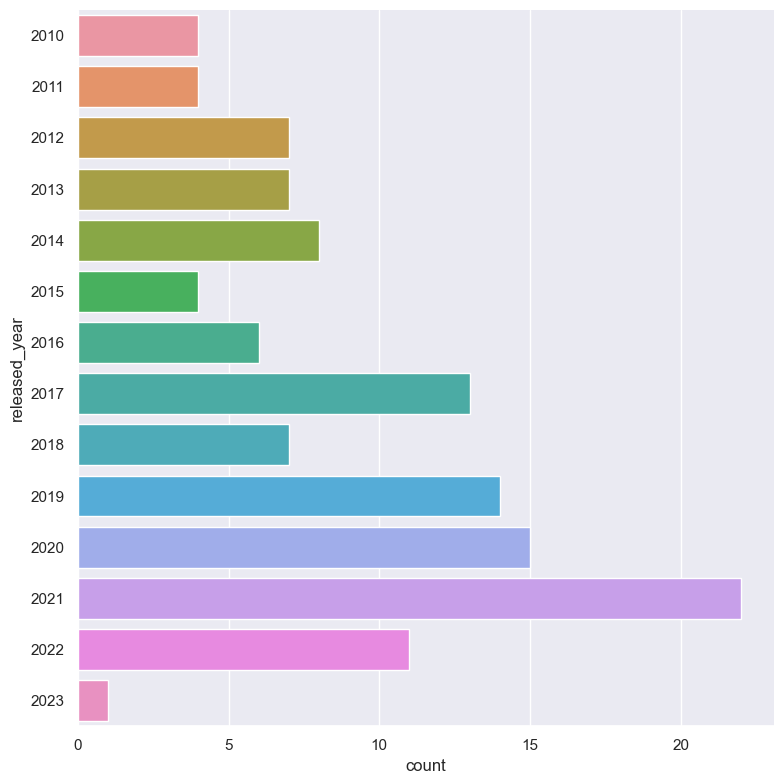

In [518]:
Billion = spotify_billion[spotify_billion["Billion"] == 'Over']
print("Number of Songs with over a billion streams :", len(Billion))
print(Billion["released_year"].value_counts())
sb.catplot(y = "released_year", data = Billion, kind = "count", height = 8)

In [519]:
## Graphs to compare the distribution of songs

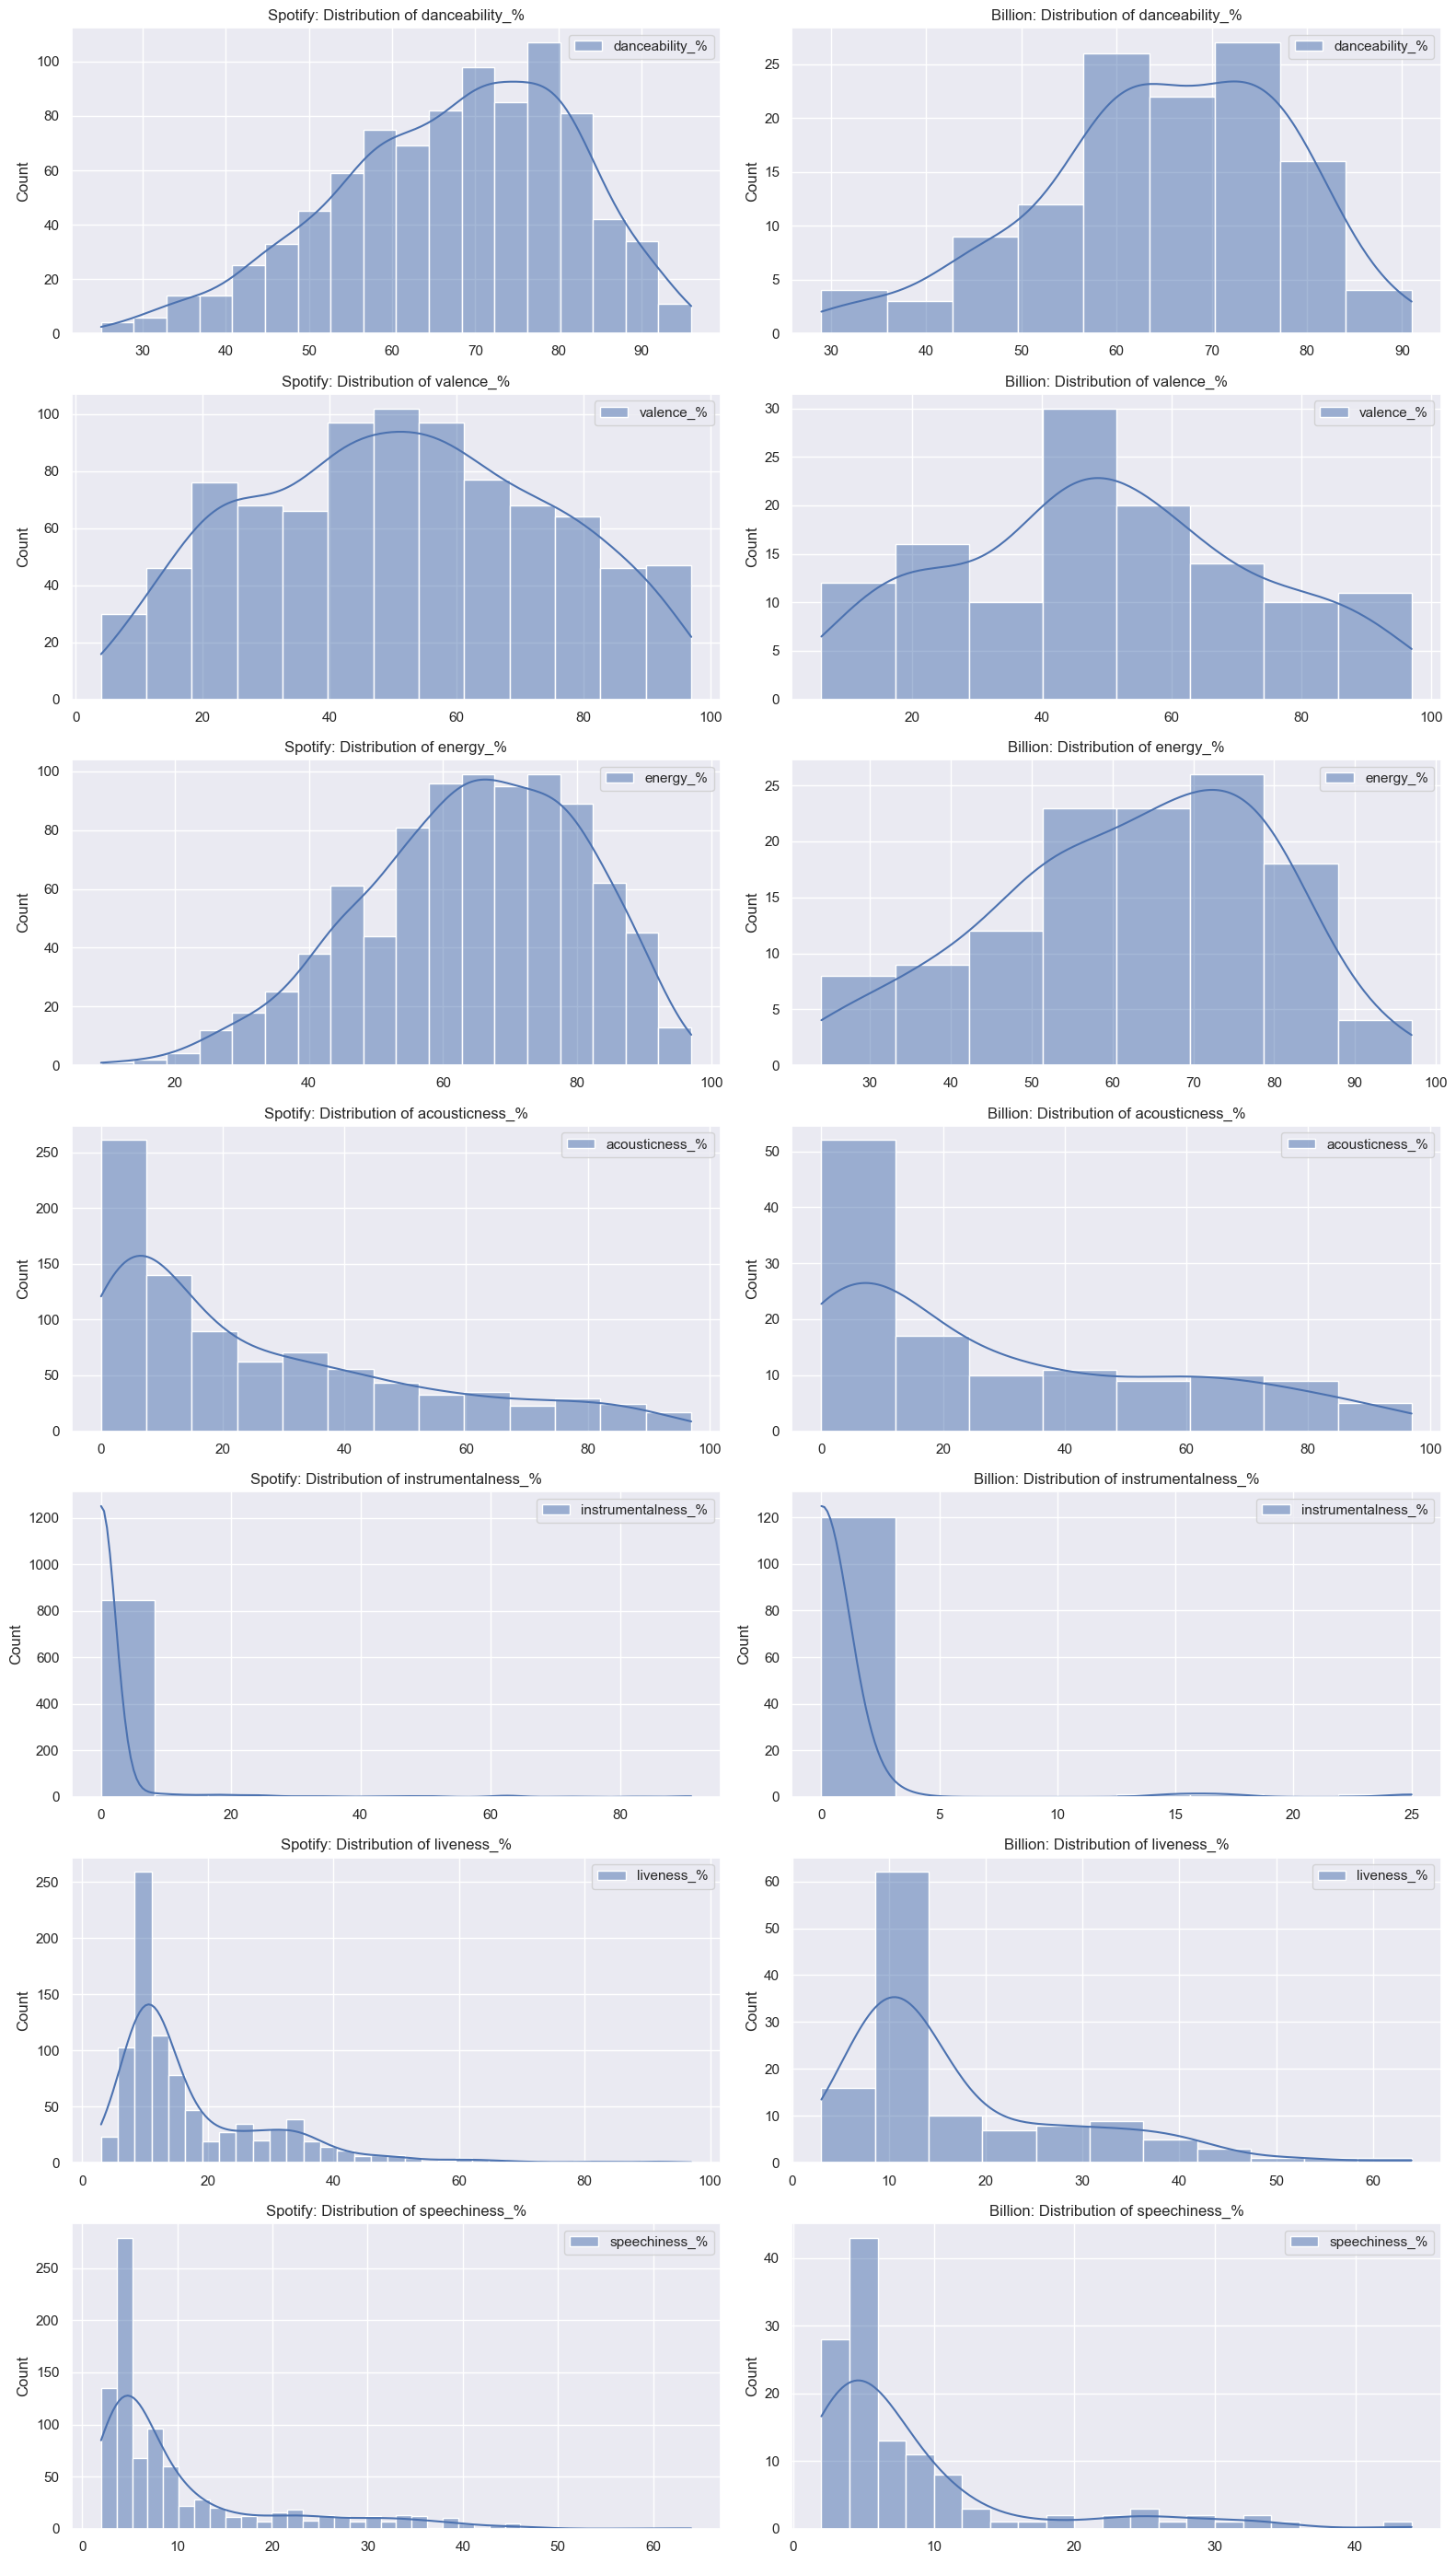

In [520]:
# Define the list of columns to plot for the first DataFrame (spotify)
columns_to_plot_spotify = ["danceability_%", "valence_%", "energy_%", 
                            "acousticness_%", "instrumentalness_%", 
                            "liveness_%", "speechiness_%"]

# Define the list of columns to plot for the second DataFrame (Billion)
columns_to_plot_billion = ["danceability_%", "valence_%", "energy_%", 
                           "acousticness_%", "instrumentalness_%", 
                           "liveness_%", "speechiness_%"]

# Create a figure with subplots for each histogram (two columns)
fig, axes = plt.subplots(nrows=len(columns_to_plot_spotify), ncols=2, figsize=(16, 4 * len(columns_to_plot_spotify)))

# Plot histograms for spotify data in the first column
for i, column in enumerate(columns_to_plot_spotify):
    data_spotify = pd.DataFrame(spotify_billion[column])
    sb.histplot(data_spotify, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Spotify: Distribution of {column}')
    axes[i, 0].set_xlabel('')  # Remove x-axis label for better layout

# Plot histograms for Billion data in the second column
for i, column in enumerate(columns_to_plot_billion):
    data_billion = pd.DataFrame(Billion[column])
    sb.histplot(data_billion, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Billion: Distribution of {column}')
    axes[i, 1].set_xlabel('')  # Remove x-axis label for better layout

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

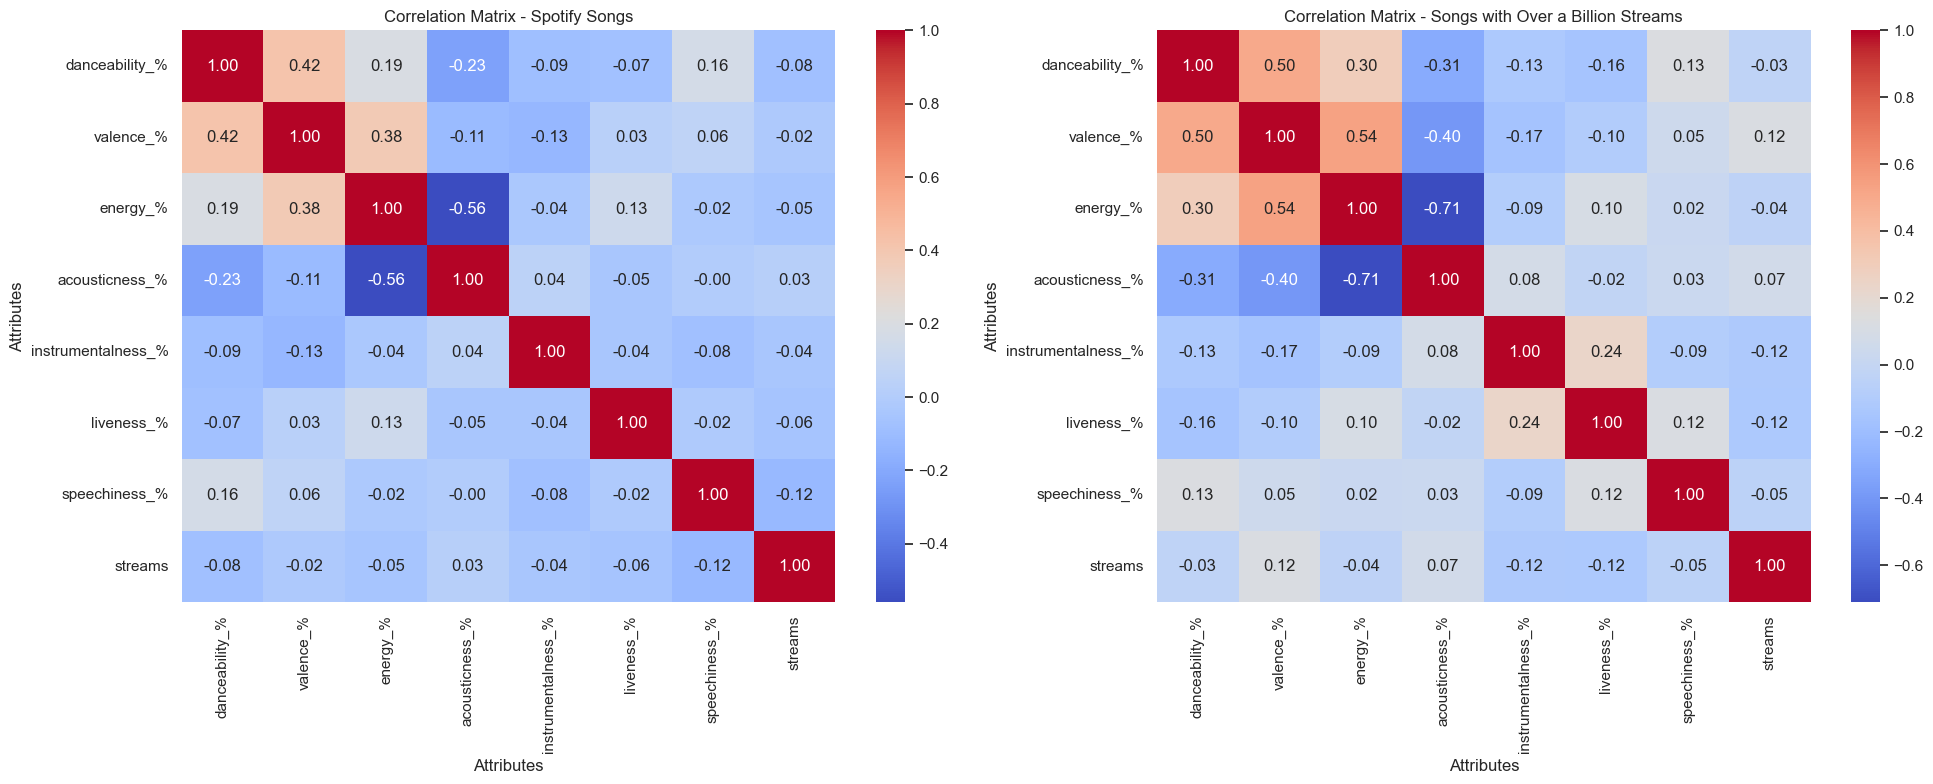

In [521]:
# Define the attributes to investigate correlation with song popularity
attributes = ['danceability_%', 'valence_%', 'energy_%', 
              'acousticness_%', 'instrumentalness_%', 
              'liveness_%', 'speechiness_%', 'streams']

# Calculate the correlation matrix for spotify DataFrame
correlation_matrix_spotify = spotify_billion[attributes].corr()

# Calculate the correlation matrix for Billion DataFrame
correlation_matrix_billion = Billion[attributes].corr()

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot heatmap for spotify correlation matrix (left subplot)
sb.heatmap(correlation_matrix_spotify, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix - Spotify Songs')
axes[0].set_xlabel('Attributes')
axes[0].set_ylabel('Attributes')

# Plot heatmap for Billion correlation matrix (right subplot)
sb.heatmap(correlation_matrix_billion, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix - Songs with Over a Billion Streams')
axes[1].set_xlabel('Attributes')
axes[1].set_ylabel('Attributes')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [522]:
# Histogram of Numeric across Categorical with Marginals
fig = px.histogram(spotify_billion, x = "released_year", color = "Billion", marginal = "box")
fig.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8627450980392157

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8597285067873304



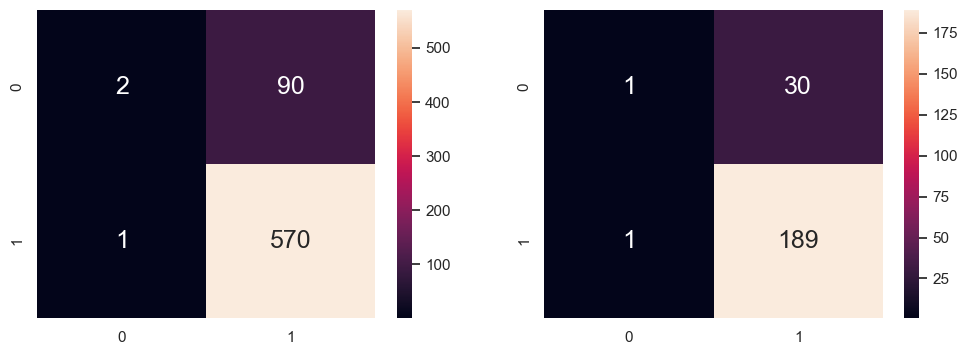

In [523]:
df = pd.DataFrame(spotify_billion)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(df['Billion'])
X = pd.DataFrame(df[["danceability_%", "valence_%", "energy_%", 
                            "acousticness_%", "instrumentalness_%", 
                            "liveness_%", "speechiness_%"]])  # Note the use of square brackets for column names

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=3)# create the decision tree object
dectree.fit(X_train, y_train)  # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
plt.show()  # Add this to display the plot

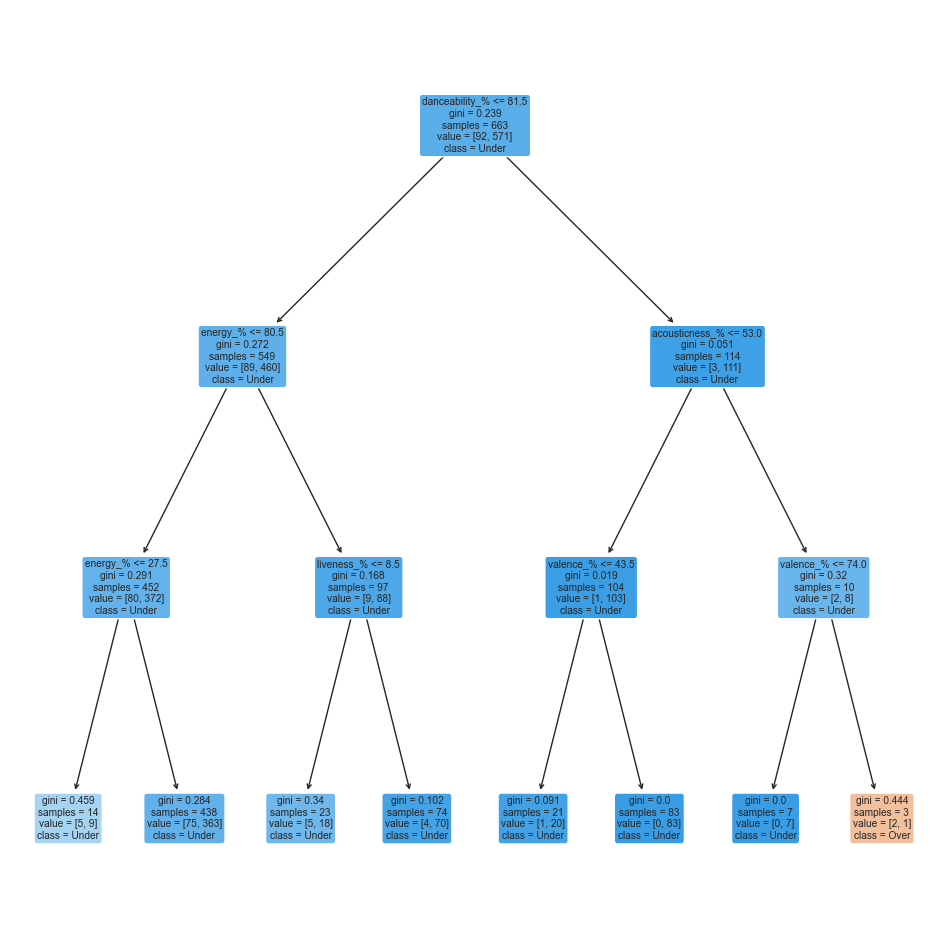

In [524]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert feature names to a list of strings
feature_names = list(X_train.columns)

# Plot the trained Decision Tree
plt.figure(figsize=(12, 12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=feature_names,
          class_names=["Over", "Under"])

plt.show()

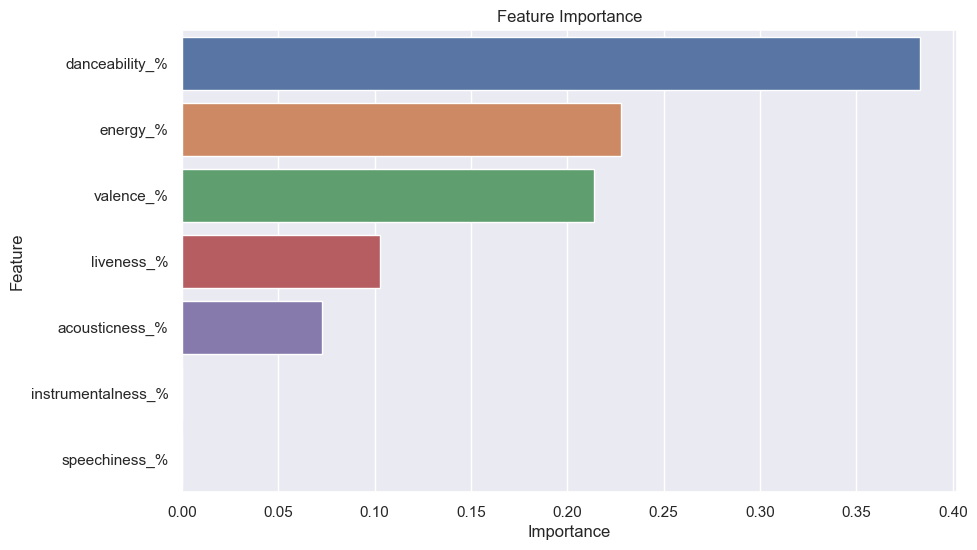

In [525]:
# Extract feature importances from the trained Decision Tree
feature_importances = dectree.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Analysis of approach 3 
Classification Accuracy for the Train Dataset is around 0.85. This indicates that the model correctly predicted the class of about 85% of the samples in the training dataset.

Classification Accuracy for the Test Dataset is around 0.88. This value indicates that the model correctly predicted the class of about 88% of the samples in the test dataset. This is slightly higher than the accuracy on the training data, which can indicate good generalization of the model.


Limitations: 
- Inconsistency (based on tree model which depends on train/test split)
- Does not adequately answer the problem statement (predicting popularity from attributes)


Using the Decision Tree, you can follow a branch with the highest success rate. 

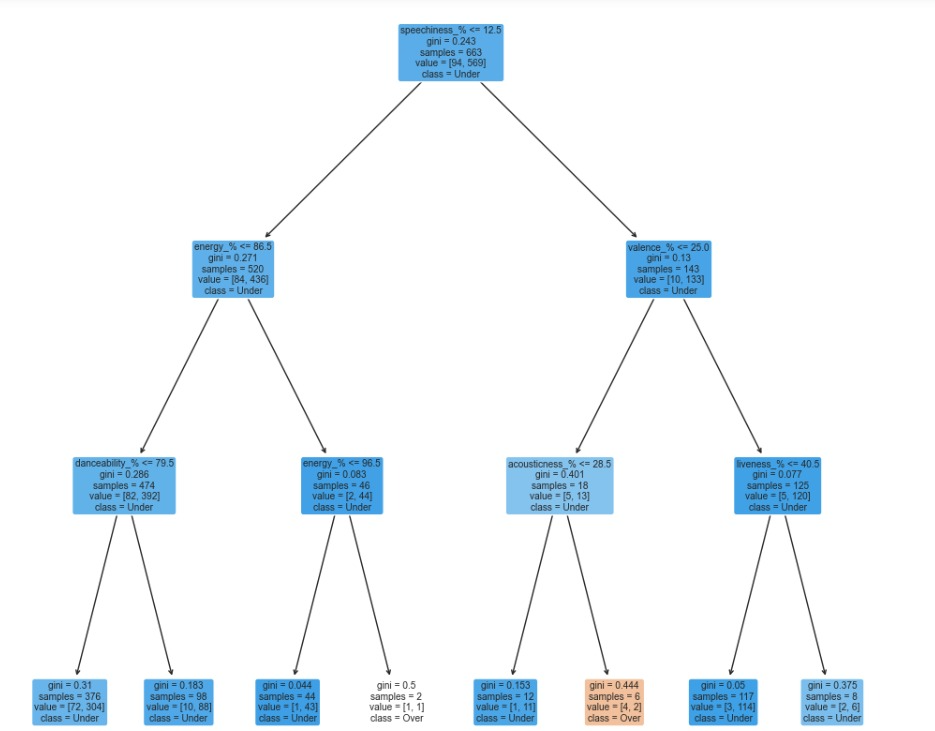

For example, in the decision tree above:
<= 12.5% speechiness
84/516 = 0.1628 success rate vs 10/143 = 0.07 success rate

<= 86.5% energy
82/474 = 0.173 success rate vs 2/46 = 0.043 success rate

<= 79.5% danceability
72/376 = 0.19 success rate vs 10/98 = 0.1 success rate


Conclusion: Making a song with low speechiness (<=12.5%), not overly high energy (<=86.5%), and not overly high danceability (<=79.5%) has the highest success rate of getting over a billion views. 


## Conclusion 
In summary, these accuracy scores suggest that this model is performing reasonably well on both the training and test datasets, with slightly higher performance on the test data, which is a good sign of generalization.

# Approach 4 (Clustering)

In [526]:
# Remove the flawed row
spotify_cleaned = spotify

print("Number of rows after removing the flawed row:", len(spotify_cleaned))

Number of rows after removing the flawed row: 884


C:\Users\hangb\Downloads\Anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hangb\AppData\Local\Temp\ipykernel_38476\2684098414.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



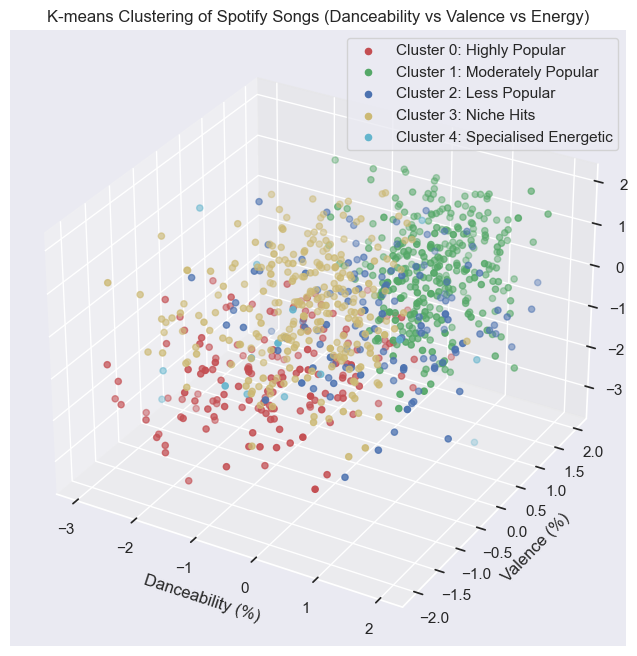

In [527]:
from sklearn.metrics import accuracy_score

# 3D K-means cluster code
from mpl_toolkits.mplot3d import Axes3D

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
spotify_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Define the labels for each cluster
cluster_labels = {
    0: 'Highly Popular',
    1: 'Moderately Popular',
    2: 'Less Popular',
    3: 'Niche Hits',
    4: 'Specialised Energetic'
}

# Plotting 3D scatter plot for visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c']  # Assigning colors to clusters
for i in range(k):
    cluster_data = X_scaled[spotify_cleaned['cluster'] == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], c=colors[i], label=f'Cluster {i}: {cluster_labels[i]}')

ax.set_xlabel('Danceability (%)')
ax.set_ylabel('Valence (%)')
ax.set_zlabel('Energy (%)')
ax.set_title('K-means Clustering of Spotify Songs (Danceability vs Valence vs Energy)')
ax.legend()
plt.show()
# Select relevant features (Danceability%, Valence%, Energy%)
X = spotify_cleaned[['danceability_%', 'valence_%', 'energy_%']]



C:\Users\hangb\Downloads\Anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Popularity Labels:
popularity_label
Moderately Popular       211
Specialised Energetic    202
Less Popular             190
Highly Popular           146
Niche Hits               135
Name: count, dtype: int64


C:\Users\hangb\AppData\Local\Temp\ipykernel_38476\2850687403.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hangb\AppData\Local\Temp\ipykernel_38476\2850687403.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



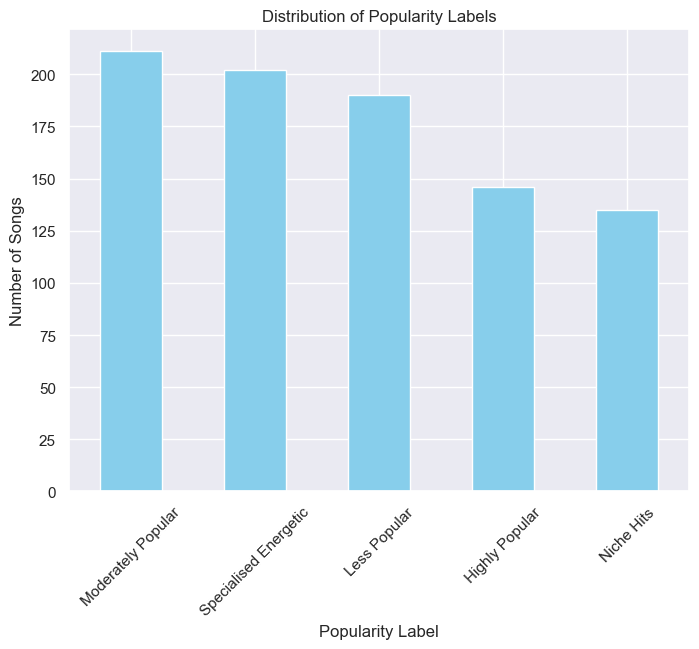


Accuracy: 0.9830508474576272

Predicted Popularity Labels for Test Data:
         Actual Popularity   Predicted Popularity
44      Moderately Popular     Moderately Popular
408         Highly Popular         Highly Popular
695  Specialised Energetic  Specialised Energetic
800             Niche Hits             Niche Hits
948             Niche Hits             Niche Hits
..                     ...                    ...
123     Moderately Popular     Moderately Popular
927         Highly Popular         Highly Popular
542           Less Popular           Less Popular
29      Moderately Popular     Moderately Popular
261  Specialised Energetic  Specialised Energetic

[177 rows x 2 columns]


C:\Users\hangb\Downloads\Anaconda2\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [528]:
# Perform K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
spotify_cleaned['cluster'] = kmeans.fit_predict(X)

# Define popularity labels based on cluster analysis
popularity_labels = {
    0: 'Highly Popular',
    1: 'Moderately Popular',
    2: 'Less Popular',
    3: 'Niche Hits',
    4: 'Specialised Energetic'
}
spotify_cleaned['popularity_label'] = spotify_cleaned['cluster'].map(popularity_labels)

# Print popularity labels and number of data points in each label
print("Popularity Labels:")
print(spotify_cleaned['popularity_label'].value_counts())

# Plot the distribution of popularity labels
plt.figure(figsize=(8, 6))
spotify_cleaned['popularity_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Popularity Labels')
plt.xlabel('Popularity Label')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, spotify_cleaned['popularity_label'], test_size=0.2, random_state=42)

# Train a classification model to predict song popularity
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict popularity labels for test data
y_pred = model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print the predicted popularity labels for test data
print("\nPredicted Popularity Labels for Test Data:")
print(pd.DataFrame({'Actual Popularity': y_test, 'Predicted Popularity': y_pred}))

## Analysis on Approach 4

This k-means clustering model achieved an impressive accuracy of approximately 98%. This indicates that the model is highly effective in predicting the popularity labels for songs based on their attributes like danceability, valence, and energy.

This approach offers a systematic and data-driven method for understanding music trends and predicting the success of songs in the ever-evolving music industry.



## Conclusion
- Demonstrates that attributes such as danceability, valence, and energy play a significant role in determining the popularity of songs. 
- The logistic regression model performs exceptionally well as seen through high accuracy
- This predictive capability can be leveraged by music industry professionals, such as music producers, artists to better understand audience preferences and tailor their content accordingly. 


# ////////////////////////////////////////

# Overall Conclusion

## Comparing All Models
Why we chose K means clustering:
- Variables used (streams,danceability, energy, and valence)
- Large portion of the variables are used 
- Best predictive performance of the model on unseen data.
- Highest accuracy (≅ 98%)


Therefore, K-means clustering is the best fitting model that satisfies our problem statement.

## What we have learnt 
- mpl_toolkits.mplot3d module in Matplotlib specifically designed for creating 3D plots within Matplotlib
- other visualization libraries (plotly)
- ML model (K-mean clustering) 


## Data-Driven Insights
- We gained valuable insights into the impact of musical attributes (danceability, valence, energy) on song popularity.
- Understanding these attributes allowed us to explore patterns and correlations within the data.


## Outcome 
- Users / artists / music producers can confidently estimate how popular their song will be based on its danceability, energy, and valence


## Recommendation
- Utilise Different exploratory tools
- Feedback Loop: Gather feedback from listeners to refine the model further.
- Collaboration: Combine data-driven insights with artistic intuition. Music is more than numbers—it’s emotion and creativity.
- Real-Time Monitoring: Continuously update the model as musical trends evolve.


## Limitations
- Subjectivity: Music is subjective; individual preferences vary widely.
- Data Quality: Ensure high-quality data for accurate predictions.
- External Factors: Popularity depends on external factors (e.g., cultural context, marketing efforts).
